<a href="https://colab.research.google.com/github/YusufAldamami/ev-data/blob/main/EDA%20documentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
print('hello world')

hello world


In [35]:
url='https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'

## Cleaning and prep for Washington State ev project


First I'll load the dataset. Then, I'll filter out all cars that are not from Washington State. To only want to analyze data revelant to Washington.


In [36]:
import pandas as pd

#load the dataset from the URL due to large upload size
df=pd.read_csv(url)

#filter the DF to include only rows where the 'State' column is 'WA'
df_wa=df[df['State']=='WA']

#display the first few rows of the filtered DataFrame
display(df_wa.head())

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE1G,Yakima,Yakima,WA,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
1,WP0AB2Y16L,King,Auburn,WA,98092.0,2020,PORSCHE,TAYCAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,203.0,0.0,47.0,277717723,POINT (-122.18497 47.28825),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EB2J,King,Seattle,WA,98109.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,36.0,475865722,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJYGDEF5L,King,Seattle,WA,98125.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,46.0,108837249,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,5YJXCBE22J,Thurston,Olympia,WA,98501.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,22.0,259851259,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10


## Drop State Column


Since i already filtered for Washington State cars, the 'State' column is no longer needed.

In [37]:
df_wa=df_wa.drop(columns=['State'])

#DataFrame after dropping 'State' column
display(df_wa.head())

,VIN (1-10),County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE1G,Yakima,Yakima,98908.0,2016,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,14.0,180778377,POINT (-120.60199 46.59817),PACIFICORP,5.307700e+10
1,WP0AB2Y16L,King,Auburn,98092.0,2020,PORSCHE,TAYCAN,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,203.0,0.0,47.0,277717723,POINT (-122.18497 47.28825),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EB2J,King,Seattle,98109.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,36.0,475865722,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJYGDEF5L,King,Seattle,98125.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,46.0,108837249,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,5YJXCBE22J,Thurston,Olympia,98501.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,22.0,259851259,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10


## Check and Handling any Missing Values


I'll check for any missing information in the dataset.
If there are missing values I'll decide on a simple way to handle them.

In [38]:
#Missing values before handling
display(df_wa.isnull().sum())

,0
VIN (1-10),0
County,0
City,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0
Electric Range,4


In [39]:
df_wa.dropna(subset=['Electric Range','Base MSRP','Vehicle Location'],inplace=True)

#Missing values after handling'
display(df_wa.isnull().sum())

,0
VIN (1-10),0
County,0
City,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0
Electric Range,0


## Correcting The Data Types

I'll look at the columns and make sure they have the right type of data. eg: if a column should be numbers I'll make sure it's not text so i can do calculations correctly.


In [40]:
#Data types before conversion
display(df_wa.info())

<class 'pandas.core.frame.DataFrame'>
Index: 268927 entries, 0 to 269672
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         268927 non-null  object 
 1   County                                             268927 non-null  object 
 2   City                                               268927 non-null  object 
 3   Postal Code                                        268927 non-null  float64
 4   Model Year                                         268927 non-null  int64  
 5   Make                                               268927 non-null  object 
 6   Model                                              268927 non-null  object 
 7   Electric Vehicle Type                              268927 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  268927 non-null  object 
 9 

None

In [41]:
import pandas as pd

df_wa['Model Year']=pd.to_numeric(df_wa['Model Year'],errors='coerce')
df_wa['Electric Range']=pd.to_numeric(df_wa['Electric Range'],errors='coerce')
df_wa['Base MSRP']=pd.to_numeric(df_wa['Base MSRP'],errors='coerce')

#Converting 'Model Year' to a whole number type that can handle missing values to make sure its correct for filtering
if df_wa['Model Year'].isnull().any():
    df_wa['Model Year']=df_wa['Model Year'].astype('Int64') #handling whole numbers with possible missing entries
else:
    df_wa['Model Year']=df_wa['Model Year'].astype('int64')
#Data types after conversion and error handling
display(df_wa.info())

<class 'pandas.core.frame.DataFrame'>
Index: 268927 entries, 0 to 269672
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         268927 non-null  object 
 1   County                                             268927 non-null  object 
 2   City                                               268927 non-null  object 
 3   Postal Code                                        268927 non-null  float64
 4   Model Year                                         268927 non-null  int64  
 5   Make                                               268927 non-null  object 
 6   Model                                              268927 non-null  object 
 7   Electric Vehicle Type                              268927 non-null  object 
 8   Clean Alternative Fuel Vehicle (CAFV) Eligibility  268927 non-null  object 
 9 

None

## Basic Descriptive Statistics


To start understanding our cleaned data I'll calculate some basic summary statistics for the numerical columns. For an overview of the dataset


In [42]:
#Descriptive statistics for numerical columns
display(df_wa.describe())

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,268927.000000,268927.000000,268927.000000,268927.000000,268927.000000,2.689270e+05,2.689270e+05
mean,98273.588483,2021.926367,40.757503,662.732303,28.853551,2.434541e+08,5.304012e+10
std,314.217880,3.051221,79.604061,6790.024718,14.896005,6.463959e+07,1.658332e+07
min,98001.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10
25%,98052.000000,2021.000000,0.000000,0.000000,17.000000,2.190650e+08,5.303301e+10
50%,98133.000000,2023.000000,0.000000,0.000000,32.000000,2.611059e+08,5.303303e+10
75%,98382.000000,2024.000000,33.000000,0.000000,42.000000,2.768578e+08,5.305394e+10
max,99403.000000,2026.000000,337.000000,845000.000000,49.000000,4.791150e+08,5.307794e+10


## Visualize Distribution of Model Year

I want to see how the 'Model Year' of cars is distributed. I'll create a  histogram using matplotlib to show which model years are most common in our dataset.


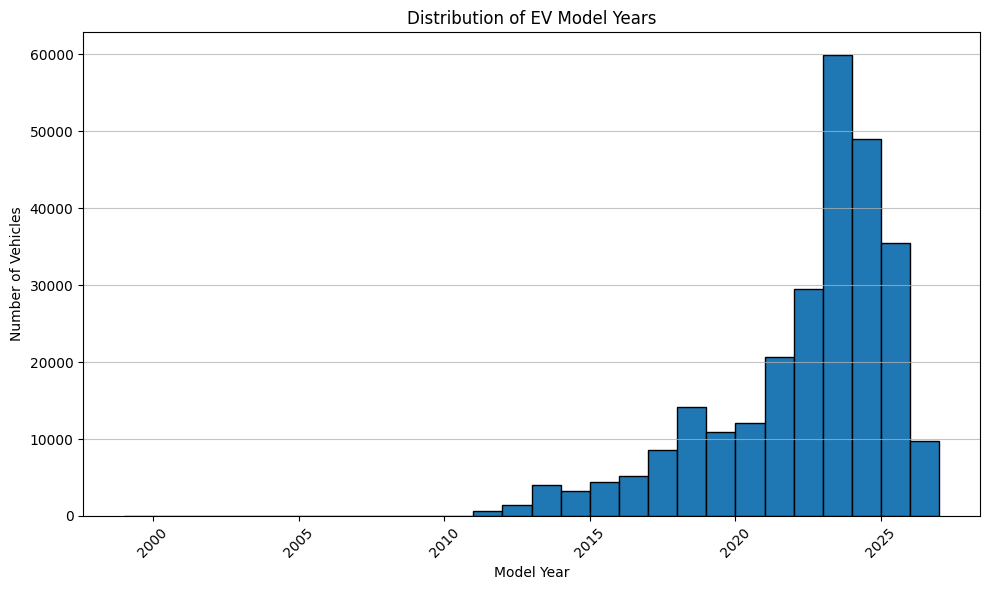

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df_wa['Model Year'],bins=range(df_wa['Model Year'].min(),df_wa['Model Year'].max()+2),edgecolor='black')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of EV Model Years')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

## Visualize Distribution of the Electric Range

I'll create a histogram to visualize the distribution of 'Electric Range' to understand the Ev ranges among vehicles in the dataset.

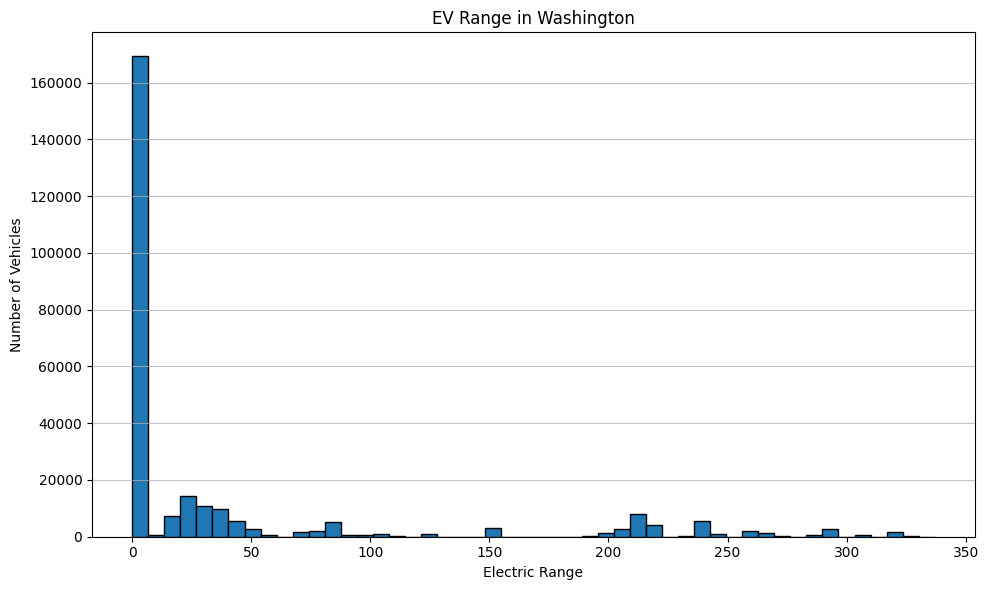

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df_wa['Electric Range'],bins=50,edgecolor='black')
plt.xlabel('Electric Range')
plt.ylabel('Number of Vehicles')
plt.title('EV Range in Washington')
plt.grid(axis='y',alpha=0.75)
plt.tight_layout()
plt.show()

## Visualizing the Distribution of the Base MSRP


I'll create a histogram to visualize the distribution of 'Base MSRP'.
This will make me understand the common price points for electric vehicles in our dataset.

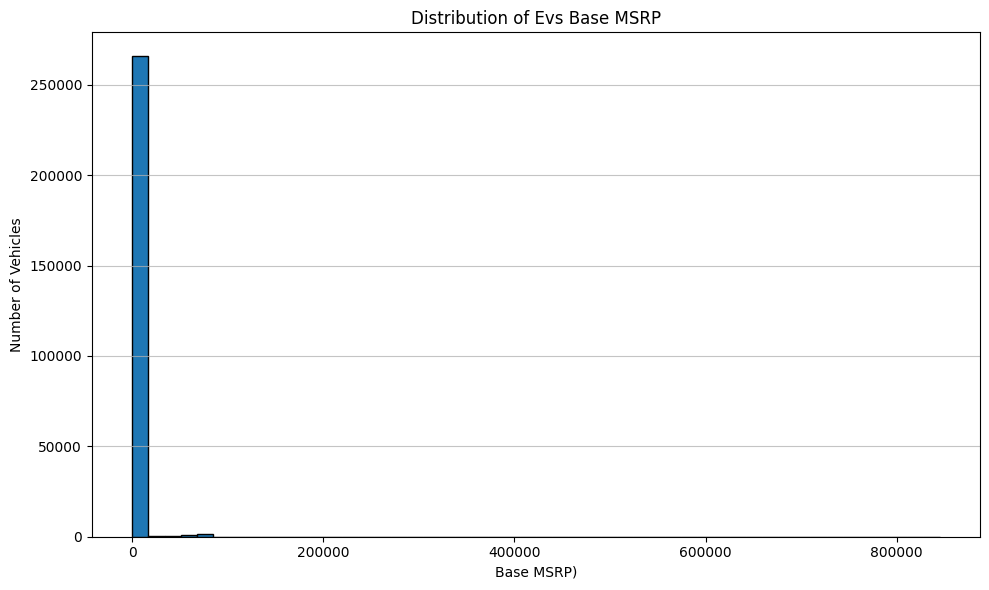

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df_wa['Base MSRP'],bins=50,edgecolor='black')
plt.xlabel('Base MSRP)')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Evs Base MSRP')
plt.grid(axis='y',alpha=0.75)
plt.tight_layout()
plt.show() #We see many 0 values due to poor entry

## Comparing Electric Range and Base MSRP


I'll create a scatter plot to visualize the relationship between 'Electric Range' and 'Base MSRP'. The dots will help identify any patterns between how far an electric vehicle can go and its price.


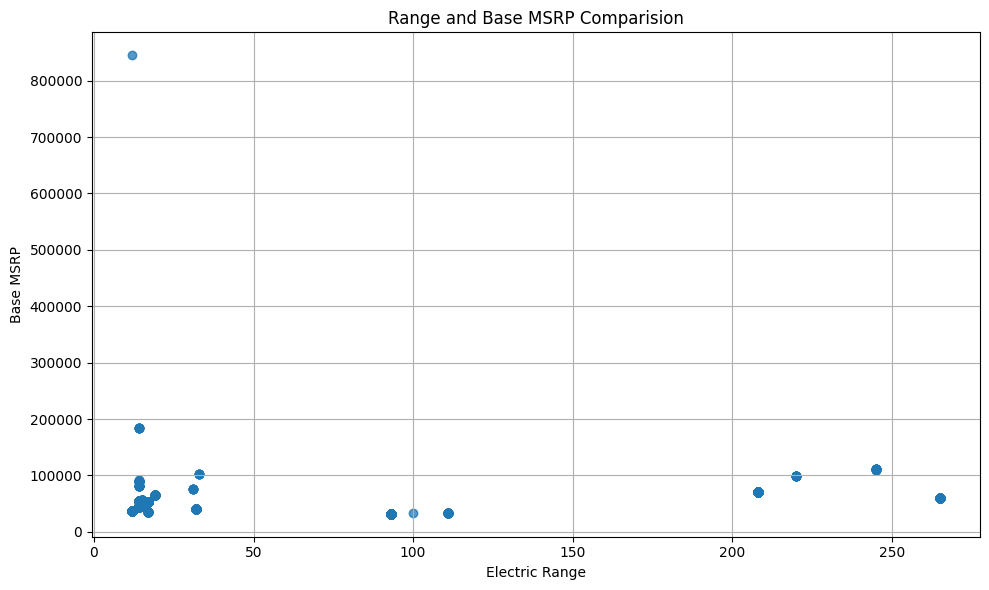

In [46]:
import matplotlib.pyplot as plt

#Filter out rows where 'Base MSRP' is 0 due to misleading charts before
plot_df = df_wa[df_wa['Base MSRP']>0][['Electric Range','Base MSRP']]

plt.figure(figsize=(10, 6))
plt.scatter(plot_df['Electric Range'],plot_df['Base MSRP'],alpha=0.5)
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.title('Range and Base MSRP Comparision')
plt.grid(True)
plt.tight_layout()
plt.show()

## Compare 'Model Year' and 'Base MSRP'

I'll create a scatter plot to visualize the relationship between 'Model Year' and 'Base MSRP'.
Same as before to see any correlation

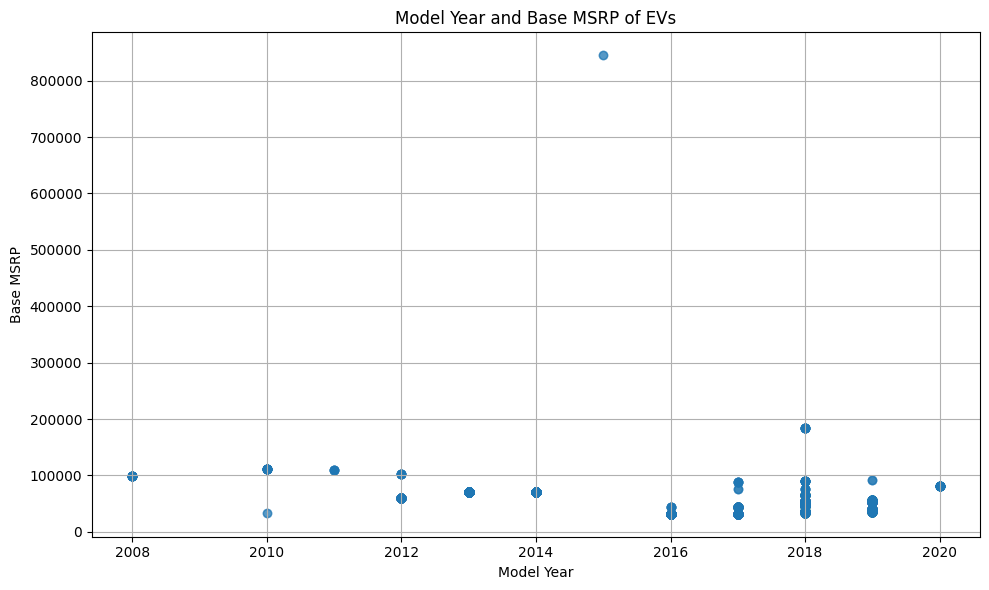

In [47]:
import matplotlib.pyplot as plt

#Filtering out rows where 'Base MSRP' is 0 for accurate charts
plot_df_year_price=df_wa[df_wa['Base MSRP']>0][['Model Year','Base MSRP']]

plt.figure(figsize=(10,6))
plt.scatter(plot_df_year_price['Model Year'],plot_df_year_price['Base MSRP'],alpha=0.5)
plt.xlabel('Model Year')
plt.ylabel('Base MSRP')
plt.title('Model Year and Base MSRP of EVs')
plt.grid(True)
plt.tight_layout()
plt.show()


## Interactive EV Range Chart with Plotly

ill make a interactive dot chart using plotly to visualize 'Electric Range' against 'Base MSRP'. This will allow us to hover over points and see more details, making the chart more engaging. We'll filter out any cars with a '0' price for this chart.

In [48]:
import plotly.express as px

#Filtering out 0 values
filtered_df=df_wa[df_wa['Base MSRP']>0]

#Create an interactive scatter plot usuing plotly
fig = px.scatter(
    filtered_df,
    x='Electric Range',
    y='Base MSRP',
    title='Interactive EV Range and Base MSRP',
    hover_data=['Model Year','Make','Model'] )#Adding hover data for more details when placing cursor over any dot

#Display the plot to see if theres a relationship between the 2 variables accurately
fig.show()

## Key Findings

1. The focus was limited to electric cars in Washington State  
2. Incomplete or incorrect records were taken out  
3. Important details like year range and price were corrected for consistency  
4. Charts showed some cars had unrealistic $0 prices  
5. Once those were removed clearer patterns between cost and range appeared  

## Next Steps
- Use predictive ML models to estimate how many EVs will be on the road in future years and the energy they will need  
